In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [32]:
# results = pd.read_csv('/Users/natemankovich/Documents/PostDoc/FunWithFlags2024/Results/hand_outlier_res_debug4.csv', index_col = 0)
results = pd.read_csv('../Results/hand_outlier_res_Feb19.csv', index_col = 0)

In [33]:
max_res = pd.DataFrame(columns = results.columns)

In [34]:
for outl in np.unique(results['Num. Outliers']):
    for alg in np.unique(results['Algorithm']):
        idx = (results['Num. Outliers'] == outl) & (results['Algorithm'] == alg)
        row = pd.DataFrame(columns = results.columns, data = [[outl, alg, np.mean(results[idx]['AUC'])]])
        max_res = pd.concat([max_res, row])

In [35]:
results = max_res.copy()

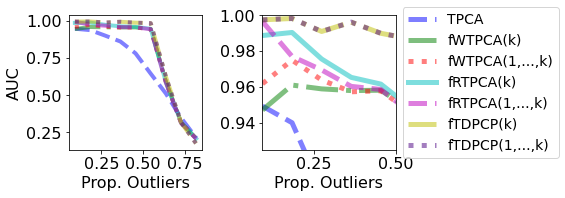

In [40]:
# import pandas as pd


plt.rcParams.update({'font.size': 16})
fig, [ax0,ax1] = plt.subplots(1,2, figsize = (8,3))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'indigo', 'maroon', 'teal', 'orange', 'purple', 'brown']
linestyles = ['--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 1, 1, 1)), (0, (5, 2)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 2, 1, 2)), (0, (3, 1, 1, 1, 1, 1, 1, 1))]
ii = 0

for alg, lbl in zip(['PCA', 'L2-WPCA', 'L1-WPCA', 'L2-RPCA',  'L1-RPCA',  'L2-DPCP', 'L1-DPCP'],['TPCA',  'fWTPCA(k)', 'fWTPCA(1,...,k)', 'fRTPCA(k)', 'fRTPCA(1,...,k)', 'fTDPCP(k)', 'fTDPCP(1,...,k)']):

    y = results[results['Algorithm'] == f'{alg}']['AUC']
    x = results[results['Algorithm'] == f'{alg}']['Num. Outliers']
    ax0.plot(x/(44),y,label = lbl, c = colors[ii], linestyle = linestyles[ii], alpha = .5, linewidth = 4)

    ii+=1

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)
ax0.set_xlabel('Prop. Outliers')
ax0.set_ylabel('AUC')
# plt.yscale('log')

ii = 0

for alg, lbl in zip(['PCA', 'L2-WPCA', 'L1-WPCA', 'L2-RPCA',  'L1-RPCA',  'L2-DPCP', 'L1-DPCP'],['TPCA',  'fWTPCA(k)', 'fWTPCA(1,...,k)', 'fRTPCA(k)', 'fRTPCA(1,...,k)', 'fTDPCP(k)', 'fTDPCP(1,...,k)']):

    y = results[results['Algorithm'] == f'{alg}']['AUC']
    x = results[results['Algorithm'] == f'{alg}']['Num. Outliers']
    ax1.plot(x/(44),y,label = lbl, c = colors[ii], linestyle = linestyles[ii], alpha = .5, linewidth = 5)

    ii+=1

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)
ax1.set_xlabel('Prop. Outliers')
ax1.set_xlim([.09,.5])
ax1.set_ylim([.925,1])


plt.tight_layout()
plt.savefig('hand_outlier_resFeb.pdf', bbox_inches = 'tight')